## Exploratory Data Analysis

####  Ques: The attached data is relates to an attrition problem of a company. Study the data very carefully. The variables are self-explanatory. Start by identiyfing the variable types of the variables. This will help you to understand the kind of data exploration techniques you must use.

#### Each row in the dataset represent an employee. Every employee corresponds to a value of the variable "Attrition". A value of attrition = 1 indicate that the employee has left the company. In the same way, attirion = 0 would indicate that the employee is still working in the company. 

#### Your task will be to find 5 most important factors which you feel affects attrition.

#### Business Travel
Q1. Is travelling frequently a factor contributing to attrition?

Q2. How does Marital Status affect travel of employees?

#### 	Department
Q1. How is Job Satisfaction among all the departments?

Q2. Which department offers the lowest salaries?

Q3. Is there any department which is more inclined towards over time?

#### Gender

Q1. Is gender inequality a reason for lower salaries and ultimately attrition? 

Q2. Are the female employees satisfied with the job environment?

#### 	Job Satisfaction

Q1. How much is work life balance, over time, business travel and monthly income affecting job satisfaction?


#### Marital Status 
Q1. Is marital status affecting work life balance?


#### Monthly Income
Q1. Is lower income contributing to attrition ?

Q2. Is married people leaving because of low income ?

Q3. Is more job involvement and less income a factor for attrition ?

#### Overtime
Q1. Does less experienced and lower income people are doing more overtime ?


#### Experience

Q1. Does less working years affect attrition ?

Q2. Does years since promotion and low income affects attrition ?

Q3. Does less job involvement affects attrition ?



In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #this overrides the default style of matplot into seaborns beautiful graphs

In [2]:
data= pd.read_csv(r"D:\Stu\PGP Data Science\Semester_1\IML\attrition.csv")
data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [3]:
data.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [4]:
data.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [5]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,3,6,NaN,2,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,Life Sciences,NaN,Male,NaN,NaN,NaN,Married,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,961,606,NaN,882,NaN,NaN,NaN,673,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,NaN,NaN,2.721769,NaN,2.729932,2.063946,2.728571,NaN,6502.931293,NaN,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,NaN,NaN,NaN,1.093082,NaN,0.711561,1.106940,1.102846,NaN,4707.956783,NaN,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1009.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,2.000000,1.000000,2.000000,NaN,2911.000000,NaN,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,3.000000,2.000000,3.000000,NaN,4919.000000,NaN,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,3.000000,3.000000,4.000000,NaN,8379.000000,NaN,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000


In [6]:
new_data = data.copy()
new_data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})
new_data['Department'] = data['Department'].map({'Human Resources': 0, 'Research & Development': 1, 'Sales':2})
new_data['EducationField'] = data['EducationField'].map({'Human Resources': 0, 'Life Sciences': 1, 'Marketing':2, 'Medical':3, 'Other':4, 'Technical Degree':5})
new_data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
new_data['MaritalStatus'] = data['MaritalStatus'].map({'Divorced': 0, 'Married': 1, 'Single':2})
new_data['OverTime'] = data['OverTime'].map({'Yes': 0, 'No': 1})

#basically created dummy variables, so that we can study the categorical variables as the numerical ones



In [7]:
new_data

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,1,2,1,2,0,3,2,4,2,5993,0,8,1,6,4,0,5,1
1,49,0,2,1,1,3,1,2,2,2,1,5130,1,10,3,10,7,1,7,8
2,37,1,1,1,4,4,1,2,1,3,2,2090,0,7,3,0,0,0,0,2
3,33,0,2,1,1,4,0,3,1,3,1,2909,0,8,3,8,7,3,0,3
4,27,0,1,1,3,1,1,3,1,2,1,3468,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,1,3,3,1,4,2,4,1,2571,1,17,3,5,2,0,3,23
1466,39,0,1,1,3,4,1,2,3,1,1,9991,1,9,3,7,7,1,7,6
1467,27,0,1,1,1,2,1,4,2,2,1,6142,0,6,3,6,2,0,3,4
1468,49,0,2,2,3,4,1,2,2,2,1,5390,1,17,2,9,6,0,8,2


In [8]:
new_data.describe()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,1.260544,2.247619,2.721769,0.600000,2.729932,2.063946,2.728571,1.097279,6502.931293,0.717007,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,0.532170,0.527792,1.331369,1.093082,0.490065,0.711561,1.106940,1.102846,0.730121,4707.956783,0.450606,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2911.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,4919.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,1.000000,2.000000,3.000000,4.000000,1.000000,3.000000,3.000000,4.000000,2.000000,8379.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,2.000000,2.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,2.000000,19999.000000,1.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [9]:
new_data[['MonthlyIncome','JobLevel','OverTime','Department']].groupby(['Department']).mean()

,MonthlyIncome,JobLevel,OverTime
Department,,,
0,6654.507937,2.031746,0.730159
1,6281.252862,1.977107,0.718002
2,6959.172646,2.255605,0.713004


In [10]:
new_data[['YearsSinceLastPromotion','JobInvolvement','TotalWorkingYears','Department']].groupby(['Department']).mean()

,YearsSinceLastPromotion,JobInvolvement,TotalWorkingYears
Department,,,
0,1.777778,2.746032,11.555556
1,2.137357,2.741935,11.342352
2,2.354260,2.701794,11.105381


# Age


In [13]:
new_data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

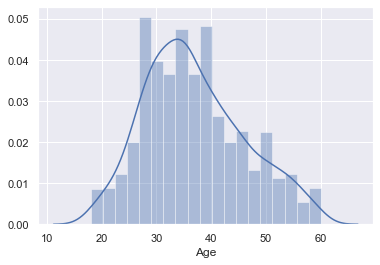

In [14]:
sns.distplot(new_data['Age'])

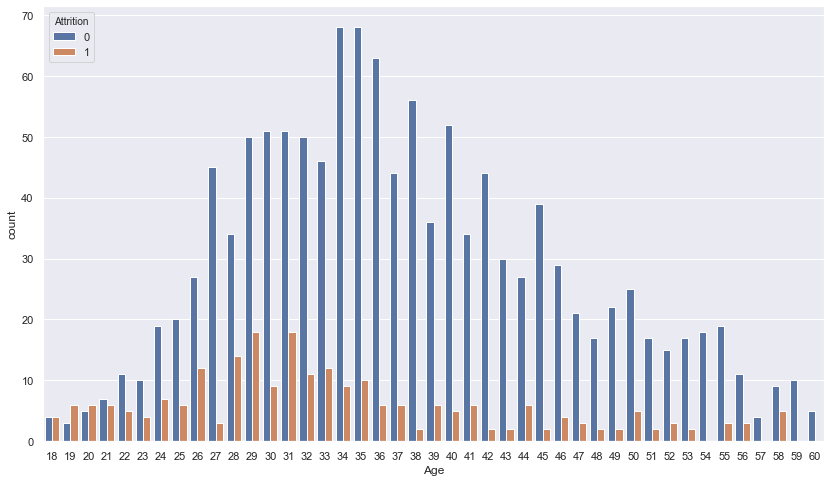

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['Age'],hue=new_data['Attrition'] , data = new_data)

# Business Travel

In [19]:
new_data['BusinessTravel'].describe()

count    1470.000000
mean        1.086395
std         0.532170
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: BusinessTravel, dtype: float64

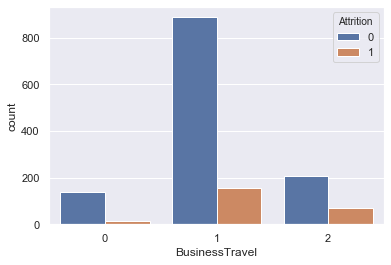

In [23]:
sns.countplot(x = new_data['BusinessTravel'],hue=new_data['Attrition'] , data = new_data)

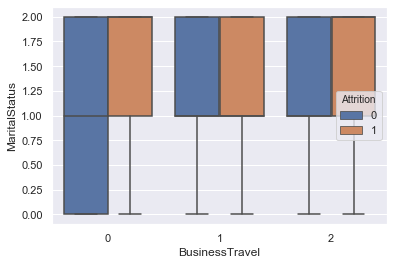

In [24]:
sns.boxplot(data=new_data, x='BusinessTravel', y='MaritalStatus', hue='Attrition')

# Department

In [25]:
new_data['Department'].describe()

count    1470.000000
mean        1.260544
std         0.527792
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Department, dtype: float64

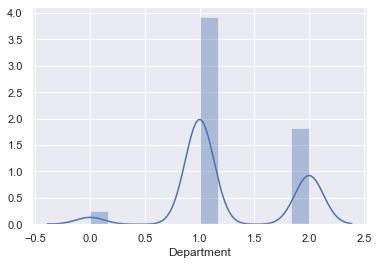

In [26]:
sns.distplot(new_data['Department'])

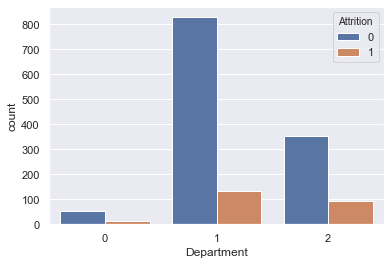

In [27]:
sns.countplot(x = new_data['Department'],hue=new_data['Attrition'] , data = new_data)

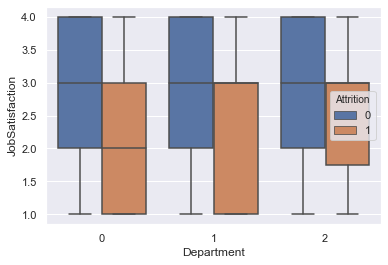

In [29]:
sns.boxplot(data=new_data, x='Department', y='JobSatisfaction', hue='Attrition')

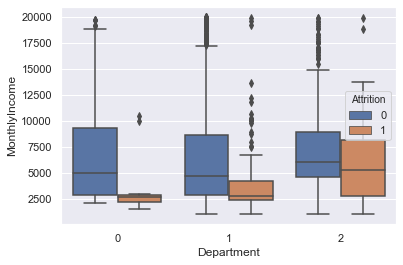

In [30]:
sns.boxplot(data=new_data, x='Department', y='MonthlyIncome', hue='Attrition')

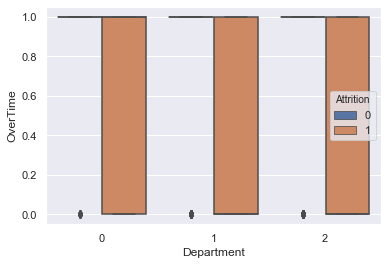

In [33]:
sns.boxplot(data=new_data, x='Department', y='OverTime', hue='Attrition')

# Education Field

In [38]:
new_data['EducationField'].describe()

count    1470.000000
mean        2.247619
std         1.331369
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: EducationField, dtype: float64

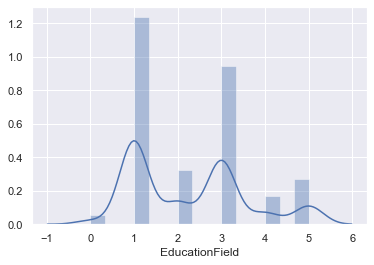

In [39]:
sns.distplot(new_data['EducationField'])

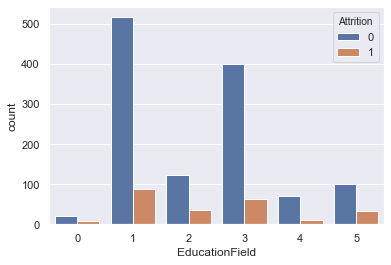

In [41]:
sns.countplot(x = new_data['EducationField'],hue=new_data['Attrition'] , data = new_data)

# Environment Satisfaction

In [42]:
new_data['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

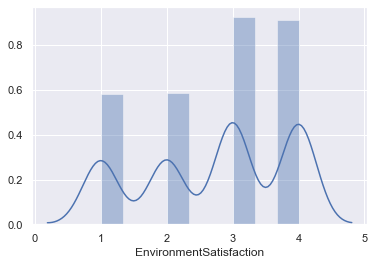

In [43]:
sns.distplot(new_data['EnvironmentSatisfaction'])

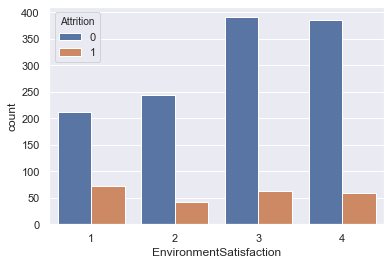

In [45]:
sns.countplot(x = new_data['EnvironmentSatisfaction'],hue=new_data['Attrition'] , data = new_data)

# Gender

In [46]:
new_data['Gender'].describe()

count    1470.000000
mean        0.600000
std         0.490065
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64

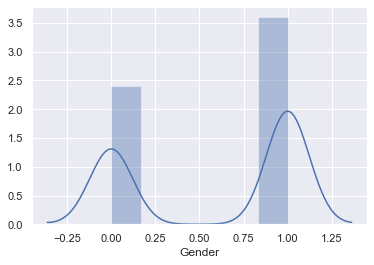

In [47]:
sns.distplot(new_data['Gender'])

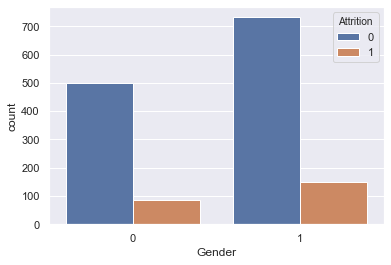

In [48]:
sns.countplot(x = new_data['Gender'],hue=new_data['Attrition'] , data = new_data)

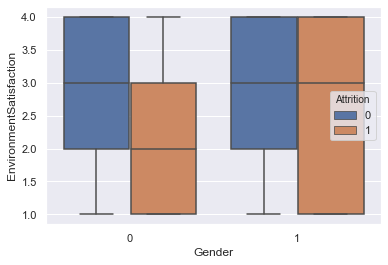

In [50]:
sns.boxplot(data=new_data, x='Gender', y='EnvironmentSatisfaction', hue='Attrition')

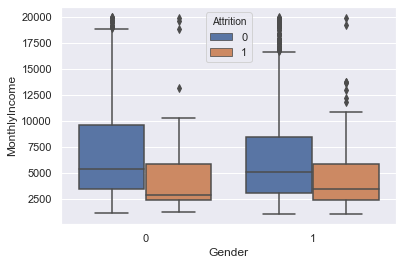

In [51]:
sns.boxplot(data=new_data, x='Gender', y='MonthlyIncome', hue='Attrition')

# Job Involvement

In [54]:
new_data['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

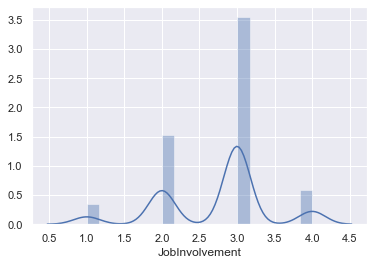

In [53]:
sns.distplot(new_data['JobInvolvement'])

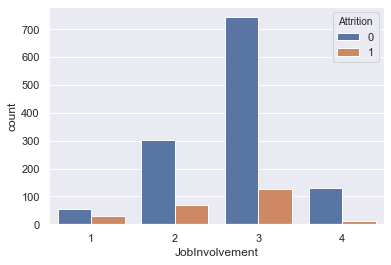

In [55]:
sns.countplot(x = new_data['JobInvolvement'],hue=new_data['Attrition'] , data = new_data)

# Job Level

In [56]:
new_data['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

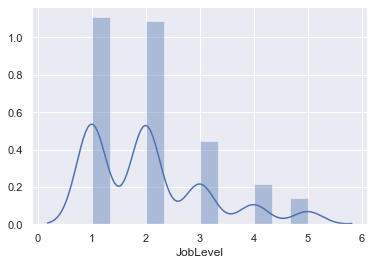

In [57]:
sns.distplot(new_data['JobLevel'])

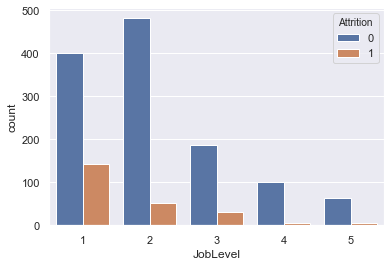

In [58]:
sns.countplot(x = new_data['JobLevel'],hue=new_data['Attrition'] , data = new_data)

# Job Satisfaction

In [59]:
new_data['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

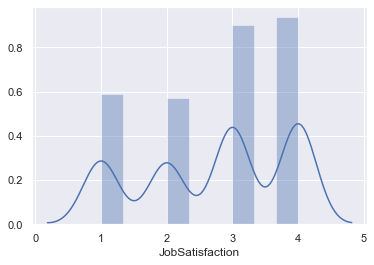

In [60]:
sns.distplot(new_data['JobSatisfaction'])

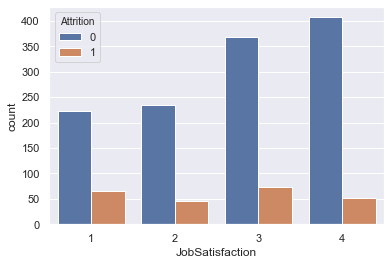

In [61]:
sns.countplot(x = new_data['JobSatisfaction'],hue=new_data['Attrition'] , data = new_data)

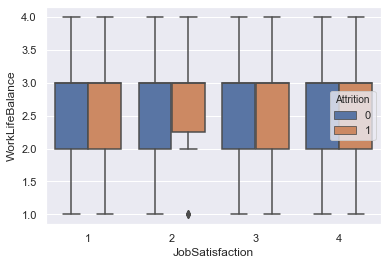

In [62]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='WorkLifeBalance', hue='Attrition')

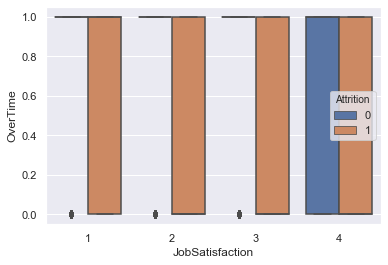

In [63]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='OverTime', hue='Attrition')

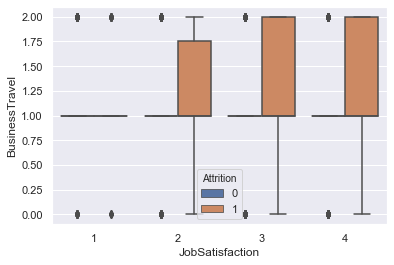

In [65]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='BusinessTravel', hue='Attrition')

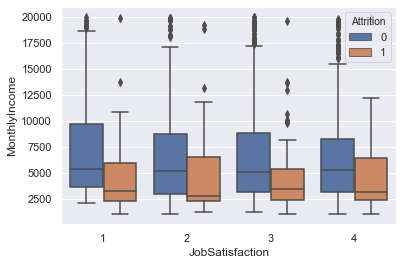

In [66]:
sns.boxplot(data=new_data, x='JobSatisfaction', y='MonthlyIncome', hue='Attrition')

# Marital Status

In [67]:
new_data['MaritalStatus'].describe()

count    1470.000000
mean        1.097279
std         0.730121
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: MaritalStatus, dtype: float64

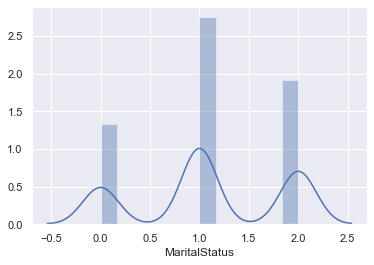

In [68]:
sns.distplot(new_data['MaritalStatus'])

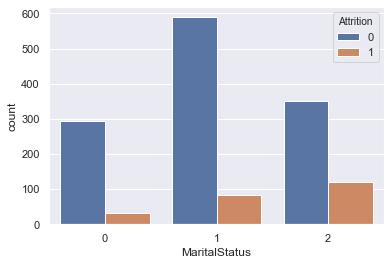

In [69]:
sns.countplot(x = new_data['MaritalStatus'],hue=new_data['Attrition'] , data = new_data)

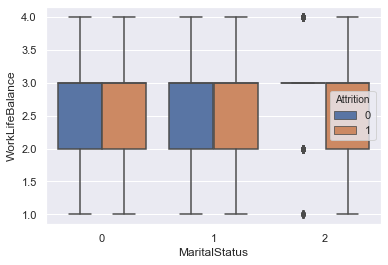

In [70]:
sns.boxplot(data=new_data, x='MaritalStatus', y='WorkLifeBalance', hue='Attrition')

# Monthly Income

In [72]:
new_data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

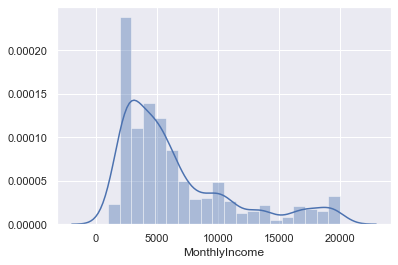

In [73]:
sns.distplot(new_data['MonthlyIncome'])

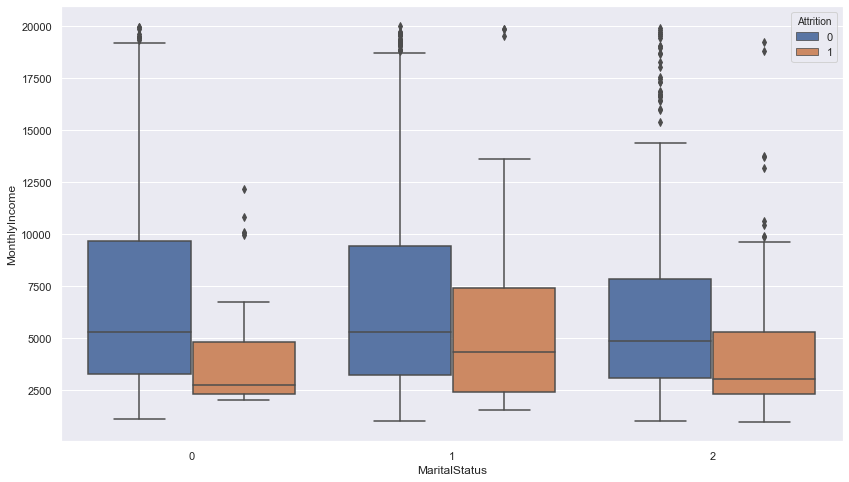

In [80]:
plt.figure(figsize=(14,8))
sns.boxplot(data=new_data, x='MaritalStatus', y='MonthlyIncome', hue='Attrition')

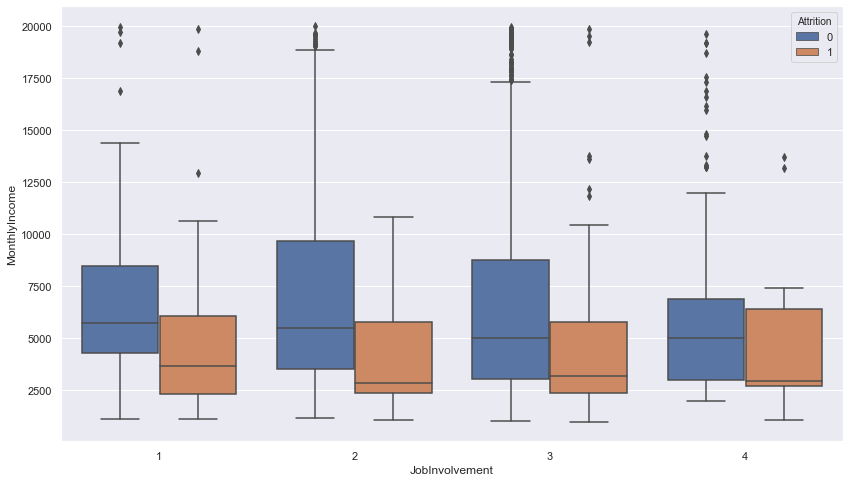

In [81]:
plt.figure(figsize=(14,8))
sns.boxplot(data=new_data, x='JobInvolvement', y='MonthlyIncome', hue='Attrition')

# OverTime

In [82]:
new_data['OverTime'].describe()

count    1470.000000
mean        0.717007
std         0.450606
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OverTime, dtype: float64

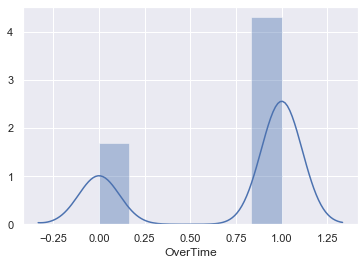

In [83]:
sns.distplot(new_data['OverTime'])

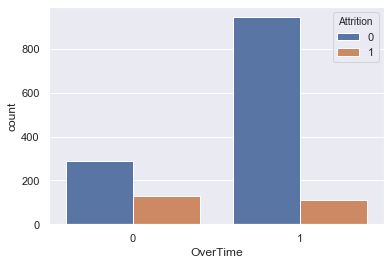

In [84]:
sns.countplot(x = new_data['OverTime'],hue=new_data['Attrition'] , data = new_data)

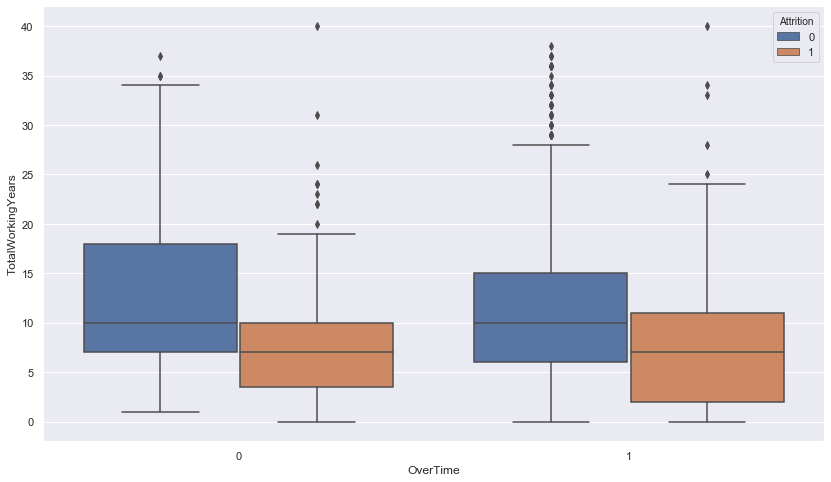

In [86]:
plt.figure(figsize=(14,8))
sns.boxplot(data=new_data, x='OverTime', y='TotalWorkingYears', hue='Attrition')

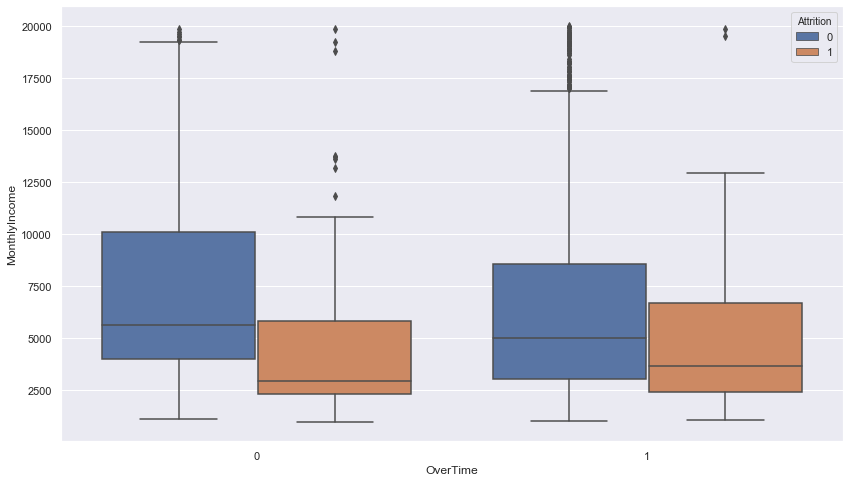

In [87]:
plt.figure(figsize=(14,8))
sns.boxplot(data=new_data, x='OverTime', y='MonthlyIncome', hue='Attrition')

# Total Working Years

In [88]:
new_data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

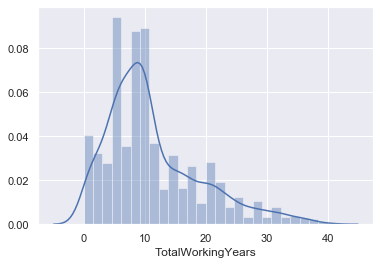

In [89]:
sns.distplot(new_data['TotalWorkingYears'])

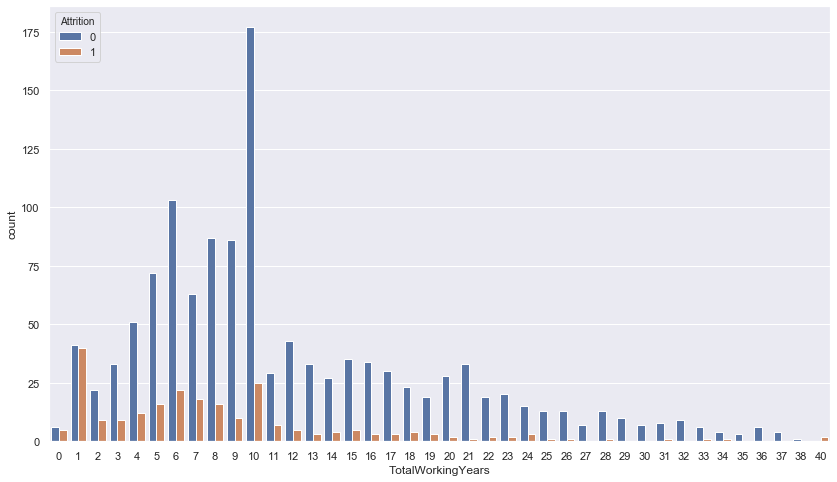

In [90]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['TotalWorkingYears'],hue=new_data['Attrition'] , data = new_data)

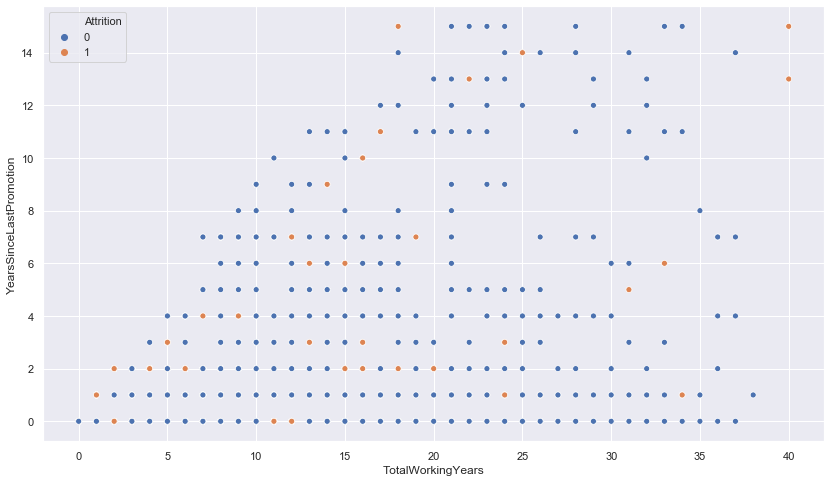

In [93]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= new_data['TotalWorkingYears'], y = new_data['YearsSinceLastPromotion'], hue = new_data['Attrition'])

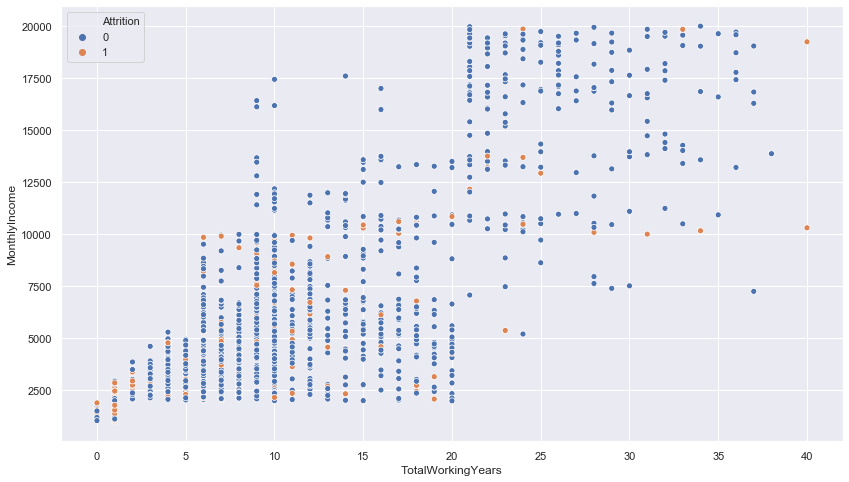

In [94]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= new_data['TotalWorkingYears'], y = new_data['MonthlyIncome'], hue = new_data['Attrition'])

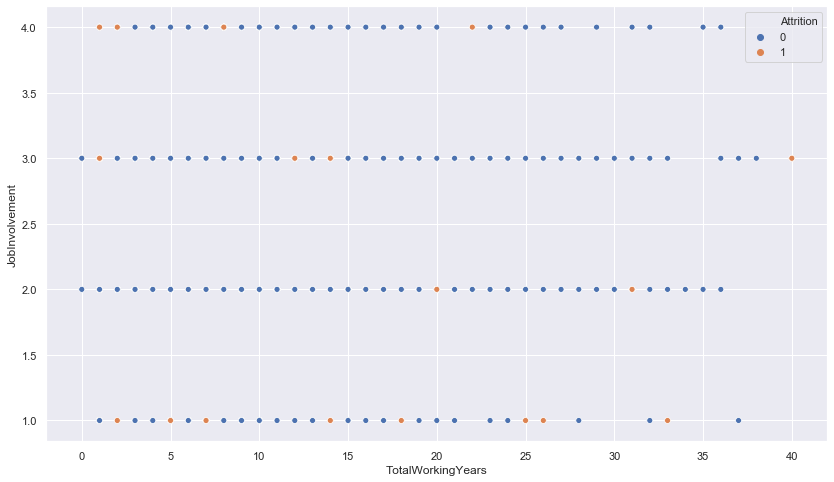

In [95]:
plt.figure(figsize=(14,8))
sns.scatterplot(x= new_data['TotalWorkingYears'], y = new_data['JobInvolvement'], hue = new_data['Attrition'])

# Work Life Balance

In [96]:
new_data['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

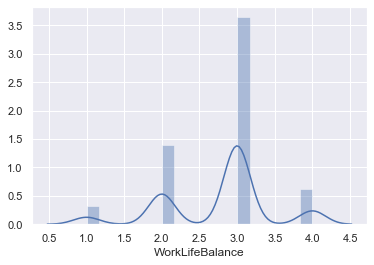

In [97]:
sns.distplot(new_data['WorkLifeBalance'])

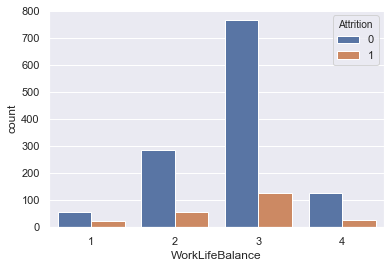

In [98]:
sns.countplot(x = new_data['WorkLifeBalance'],hue=new_data['Attrition'] , data = new_data)

# Years at Company


In [99]:
new_data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

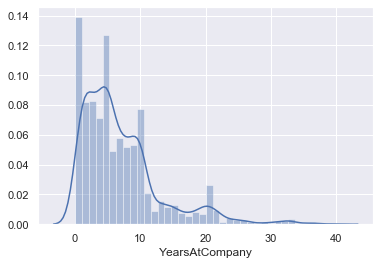

In [101]:
sns.distplot(new_data['YearsAtCompany'])

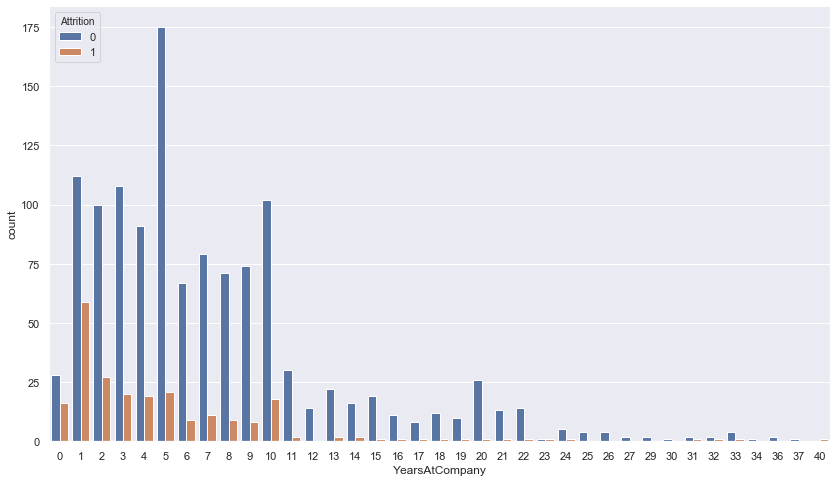

In [102]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsAtCompany'],hue=new_data['Attrition'] , data = new_data)

# Years in Current Role

In [103]:
new_data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

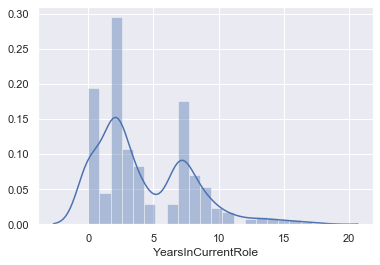

In [104]:
sns.distplot(new_data['YearsInCurrentRole'])

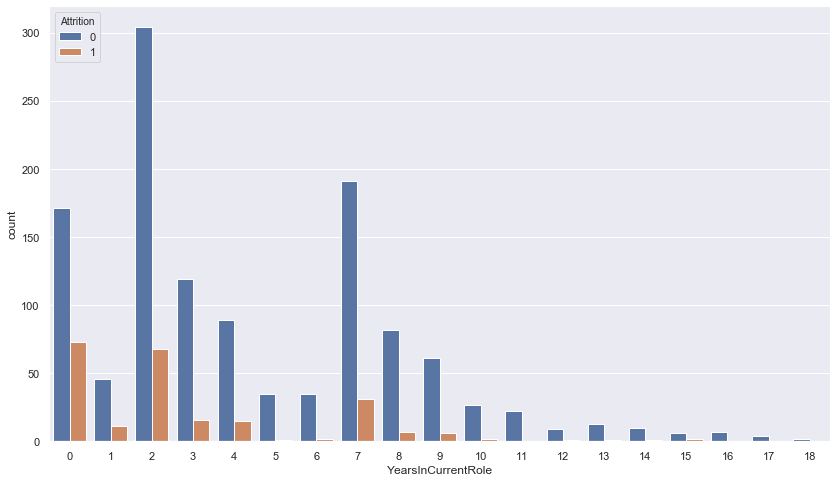

In [105]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsInCurrentRole'],hue=new_data['Attrition'] , data = new_data)

# Years Since Last Promotion

In [106]:
new_data['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

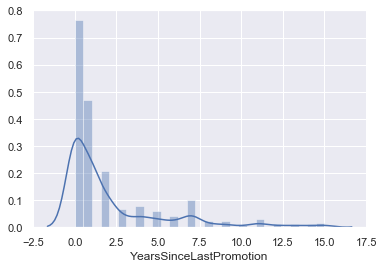

In [107]:
sns.distplot(new_data['YearsSinceLastPromotion'])

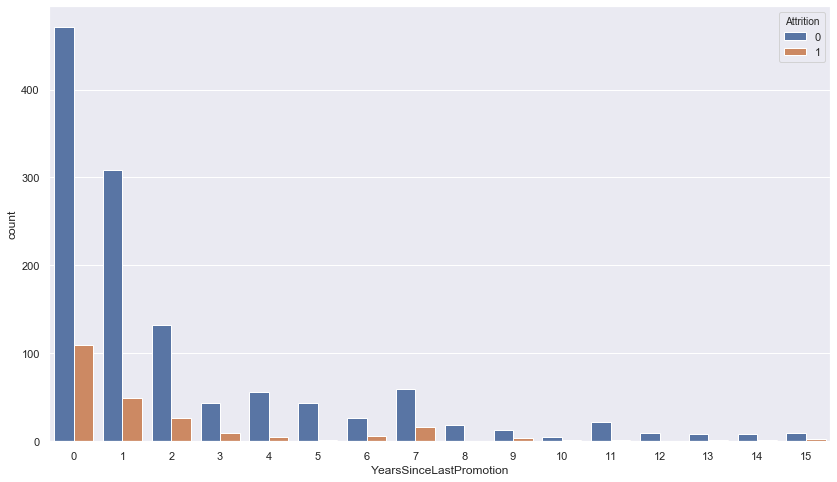

In [108]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsSinceLastPromotion'],hue=new_data['Attrition'] , data = new_data)

# YearsWithCurrManager

In [109]:
new_data['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

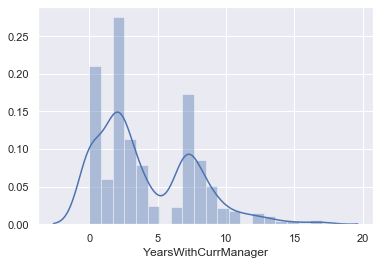

In [110]:
sns.distplot(new_data['YearsWithCurrManager'])

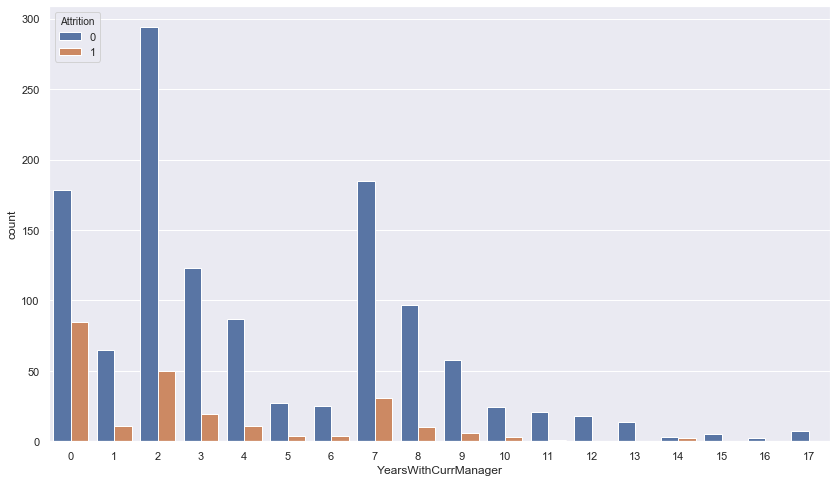

In [111]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['YearsWithCurrManager'],hue=new_data['Attrition'] , data = new_data)

# DistanceFromHome

In [112]:
new_data['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

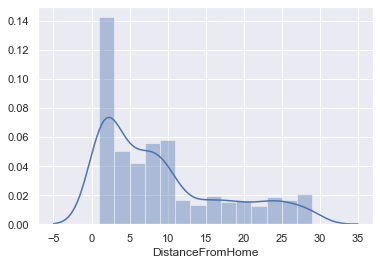

In [113]:
sns.distplot(new_data['DistanceFromHome'])

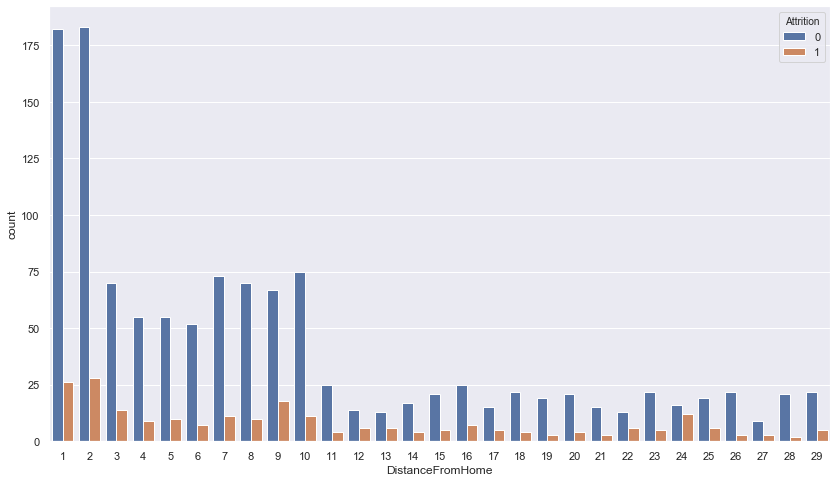

In [114]:
plt.figure(figsize=(14,8))
sns.countplot(x = new_data['DistanceFromHome'],hue=new_data['Attrition'] , data = new_data)